In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_csv('kc_cleaned_data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,is_cust_build
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0


In [46]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'has_basement', 'is_cust_build'],
      dtype='object')

# Finding features that positively correlate to price (leaving in location)

In [69]:
feats = ['price', 'is_cust_build', 'grade', 
        'view', 'waterfront', 'lat', 'long', 'zipcode',
        'sqft_living', 'bedrooms', 'bathrooms', 
        'floors', 'sqft_living15', 'sqft_above', 'date']

In [70]:
corr = df[feats].corr()
corr

,price,is_cust_build,grade,view,waterfront,lat,long,zipcode,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above
price,1.000000,0.347742,0.667951,0.393497,0.264306,0.306692,0.022036,-0.053402,0.701917,0.308787,0.525906,0.256804,0.585241,0.605368
is_cust_build,0.347742,1.000000,0.262441,0.125607,0.076735,0.020536,0.026599,-0.035377,0.274177,0.072133,0.183281,0.058319,0.198618,0.252913
grade,0.667951,0.262441,1.000000,0.249082,0.082818,0.113575,0.200341,-0.185771,0.762779,0.356563,0.665838,0.458794,0.713867,0.756073
view,0.393497,0.125607,0.249082,1.000000,0.380543,0.006321,-0.077702,0.085059,0.281715,0.078354,0.186016,0.028414,0.278928,0.166017
waterfront,0.264306,0.076735,0.082818,0.380543,1.000000,-0.012157,-0.037628,0.028923,0.104637,-0.002127,0.063629,0.020797,0.083823,0.071778
lat,0.306692,0.020536,0.113575,0.006321,-0.012157,1.000000,-0.135371,0.266742,0.052155,-0.009951,0.024280,0.049239,0.048679,-0.001199
long,0.022036,0.026599,0.200341,-0.077702,-0.037628,-0.135371,1.000000,-0.564259,0.241214,0.132054,0.224903,0.125943,0.335626,0.344842
zipcode,-0.053402,-0.035377,-0.185771,0.085059,0.028923,0.266742,-0.564259,1.000000,-0.199802,-0.154092,-0.204786,-0.059541,-0.279299,-0.261570
sqft_living,0.701917,0.274177,0.762779,0.281715,0.104637,0.052155,0.241214,-0.199802,1.000000,0.578212,0.755758,0.353953,0.756402,0.876448
bedrooms,0.308787,0.072133,0.356563,0.078354,-0.002127,-0.009951,0.132054,-0.154092,0.578212,1.000000,0.514508,0.177944,0.393406,0.479386


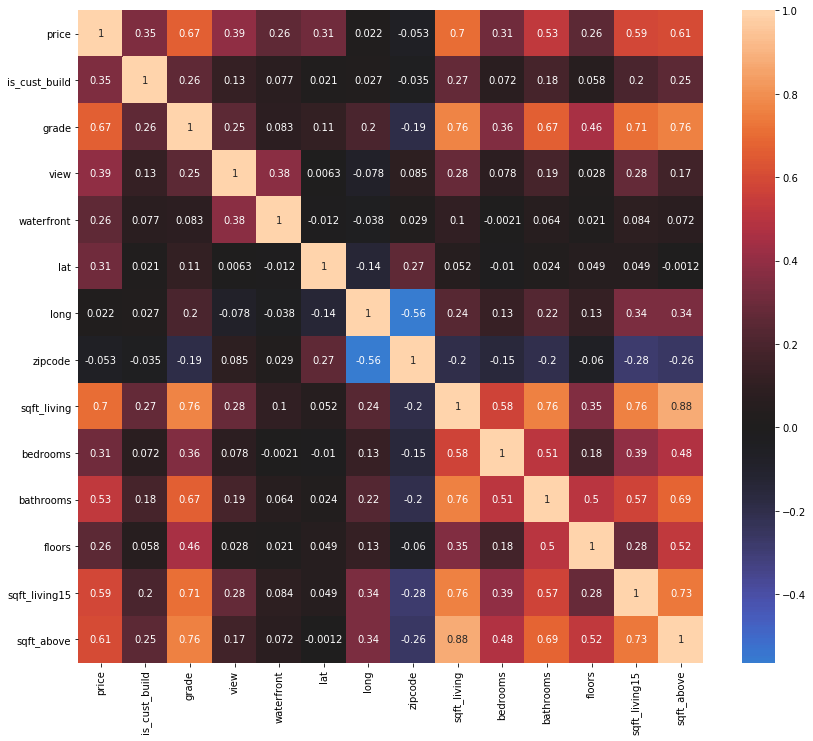

In [72]:
plt.figure(figsize=(14,12))
sns.heatmap(corr, center=0, annot=True);

In [73]:
df_high_corr_and_location=df[feats]
df_high_corr_and_location.head()

,price,is_cust_build,grade,view,waterfront,lat,long,zipcode,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above,date
0,221900.0,0,7,0.0,0.0,47.5112,-122.257,98178,1180,3,1.00,1.0,1340,1180,10/13/2014
1,538000.0,0,7,0.0,0.0,47.7210,-122.319,98125,2570,3,2.25,2.0,1690,2170,12/9/2014
2,180000.0,0,6,0.0,0.0,47.7379,-122.233,98028,770,2,1.00,1.0,2720,770,2/25/2015
3,604000.0,0,7,0.0,0.0,47.5208,-122.393,98136,1960,4,3.00,1.0,1360,1050,12/9/2014
4,510000.0,0,8,0.0,0.0,47.6168,-122.045,98074,1680,3,2.00,1.0,1800,1680,2/18/2015


In [74]:
df_high_corr_and_location.to_csv('kc_housing_data_location_and_high_correlation.csv')